In [3]:
#extract data from .nc files and save as .csv files

import os
import sys
import numpy as np
import pandas as pd
import scipy.io as sio
import netCDF4 as nc
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
url = 'https://tds.hycom.org/thredds/dodsC/GLBu0.08/expt_91.2'
file = nc.Dataset(url)
print(file.variables.keys())
lat_min = 940
lat_max = 1300
lon_min = 930
lon_max = 1350
# deg_step = 0.08
# deg_list = [lat_min*deg_step, lat_max*deg_step, lon_min*deg_step, lon_max*deg_step]
#time, depth, lat, lon
time = file['time'][0]
depth = file['depth'][1]

lat = file['lat'][lat_min:lat_max]
lon = file['lon'][lon_min:lon_max]
water_u = file['water_u'][0,1,lat_min:lat_max,lon_min:lon_max]
water_v = file['water_v'][0,1,lat_min:lat_max,lon_min:lon_max]
water_temp = file['water_temp'][0,1,lat_min:lat_max,lon_min:lon_max]

dict_keys(['lat', 'lon', 'time', 'tau', 'depth', 'surf_el', 'water_temp', 'salinity', 'water_u', 'water_v'])


(360, 420)


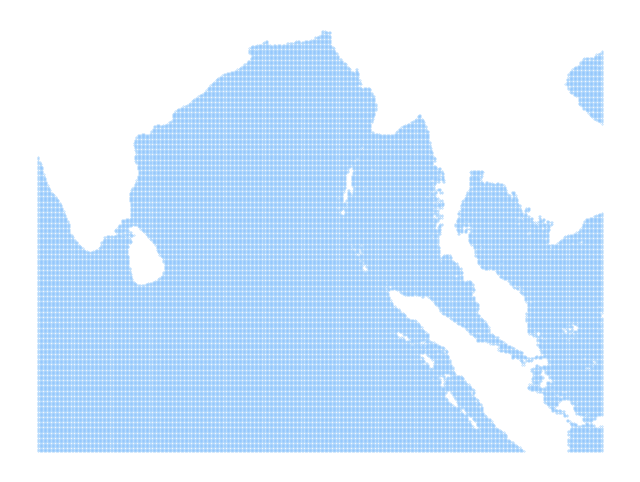

         lat        lon  water_u  water_v
0      -4.80  74.400024    0.279   -0.393
1      -4.80  74.479980    0.260   -0.418
2      -4.80  74.560059    0.245   -0.412
3      -4.80  74.640015    0.226   -0.397
4      -4.80  74.719971    0.208   -0.372
...      ...        ...      ...      ...
94978  22.32  91.680054    0.022   -0.006
94979  22.32  91.760010    0.007    0.002
94980  22.40  91.280029    0.024    0.010
94981  22.40  91.359985    0.048    0.000
94982  22.40  91.439941    0.024   -0.003

[94983 rows x 4 columns]


In [5]:
# start_date = dt.datetime(2000,1,1,0,0,0)
# time_end = start_date + dt.timedelta(hours = int(time))

lat2 = []
lon2 = []
water_u2 =[]
water_v2 =[]

lat_index = []
lon_index = []
lat3 = []
lon3 = []
water_u3 =[]
water_v3 =[]
water_temp3 = []

print(water_u.shape)
for i, x in enumerate(lat):
    for j, y in enumerate(lon):
        if water_u[i][j] != '--' and water_v[i][j] != '--':
            water_u2.append(water_u[i][j])
            water_v2.append(water_v[i][j])
            lat2.append(x)
            lon2.append(y)
        lat_index.append(i)
        lon_index.append(j)
        water_u3.append(water_u[i][j])
        water_v3.append(water_v[i][j])
        lat3.append(x)
        lon3.append(y)
        water_temp3.append(water_temp[i][j])
    

plt.figure(figsize=(8,6), dpi=100)
plt.plot(lon2, lat2, '.', markersize = 0.5, color = '#85c2fc')
#smaller dots
#turn of axis
plt.axis('off')
#add legend
# plt.xlabel('Longitude(x)')
# plt.ylabel('Latitude(y)')
plt.show()





        


data = {'lat':lat2, 'lon':lon2, 'water_u':water_u2, 'water_v':water_v2}
data_with_NaN = {'lat_index':lat_index, 'lon_index':lon_index, 'lat':lat3, 'lon':lon3, 'water_u':water_u3, 'water_v':water_v3, 'water_temp':water_temp3}
#  'water_u':[water_u[x][y] for x,y in zip(range(len(lat)),range(len(lon)))]
#         , 'water_v':[water_v[x][y] for x,y in zip(range(len(lat)),range(len(lon)))]}
df = pd.DataFrame(data)
df2 = pd.DataFrame(data_with_NaN)
#interpolate NaN values
#replace -- with NaN
df2.to_csv('hycom_with_NaN_values.csv', index=False)
df = df.dropna()
print(df)

In [18]:
#save to csv
df.to_csv('hycom.csv', index=False)